In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
lr=LinearRegression()

In [2]:
df = pd.read_csv("updated.csv", encoding="latin")
df = df.loc[:190, :]
df

C:\Users\MohitJain\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,GHRP,Income classification according to WB,Net ODA received (% of GNI),Aid dependence,Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",...,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,"Foreign direct investment, net inflows (% of GDP)",Foreign direct investment,Covid 19 Economic exposure index,Covid 19 Economic exposure index [ex aid and FDI],Covid 19 Economic exposure index [ex aid and FDI and food import]
0,Liechtenstein,No,HIC,5.61,1.33,5.14,1.12,14.31,5.47,25.99,...,4.58,57.71,4.37,4.81,4.2,2.60,1.52,3.31,3.82,3.52
1,Eritrea,No,LIC,5.61,1.33,5.14,1.12,14.31,5.47,25.99,...,4.58,165.10,10.00,4.81,4.2,2.60,1.52,10.00,10.00,10.00
2,Bahrain,No,HIC,5.61,1.33,5.14,1.12,9.40,3.70,76.20,...,3.90,101.70,10.00,0.88,10.0,0.29,0.10,6.30,7.50,8.50
3,South Sudan,Yes,LIC,5.61,1.33,35.27,10.00,14.31,5.47,98.80,...,4.58,34.40,1.80,0.20,10.0,2.60,1.52,8.00,8.00,8.00
4,Bahamas,No,HIC,5.61,1.33,5.14,1.12,19.30,7.70,25.99,...,10.00,61.50,5.20,4.81,4.2,3.96,1.60,6.10,7.60,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Turkmenistan,No,MIC,0.08,1.33,5.14,1.12,14.31,5.47,25.99,...,4.58,30.30,1.30,4.81,4.2,4.87,1.90,0.80,0.70,0.70
187,Micronesia,No,MIC,25.08,10.00,7.05,1.00,14.31,5.47,25.99,...,4.58,18.50,4.37,4.81,4.2,2.60,1.52,3.70,0.50,0.50
188,Afghanistan,Yes,LIC,19.37,7.20,1.99,1.12,32.30,10.00,11.60,...,0.40,7.50,4.37,12.19,4.2,0.62,0.20,2.40,2.00,0.40
189,Palau,No,HIC,7.87,1.40,0.79,1.12,22.80,9.10,2.60,...,4.58,57.71,4.37,4.81,4.2,7.57,3.00,2.80,3.10,0.20


In [3]:
df.corr()

,Net ODA received (% of GNI),Aid dependence,Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",primary commodity export dependence,tourism as percentage of GDP,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,"Foreign direct investment, net inflows (% of GDP)",Foreign direct investment,Covid 19 Economic exposure index,Covid 19 Economic exposure index [ex aid and FDI],Covid 19 Economic exposure index [ex aid and FDI and food import]
Net ODA received (% of GNI),1.000000,0.886556,0.218284,0.199497,0.260634,0.225997,-0.082332,-0.080675,-0.051581,-0.044540,-0.094961,-0.079246,0.005849,-0.011748,0.001979,0.003411,0.231556,-0.053470,-0.094347
Aid dependence,0.886556,1.000000,0.238976,0.217125,0.262258,0.244550,-0.092051,-0.081697,-0.014884,-0.012790,-0.139071,-0.115089,0.029464,-0.081867,0.009052,-0.024397,0.191193,-0.078486,-0.125459
Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,0.218284,0.238976,1.000000,0.930646,0.187175,0.199793,-0.037115,-0.064191,0.049594,0.108308,-0.061104,-0.076773,-0.027478,-0.175603,0.030677,-0.037140,0.280895,0.280759,0.256343
Remittances,0.199497,0.217125,0.930646,1.000000,0.135741,0.147340,-0.030363,-0.051963,0.006642,0.042899,-0.041382,-0.074201,-0.008688,-0.114429,-0.018799,-0.086704,0.248695,0.257721,0.243131
Food imports (% of total merchandise exports),0.260634,0.262258,0.187175,0.135741,1.000000,0.934734,-0.088225,-0.060845,0.248588,0.199008,-0.002229,0.028378,0.011424,-0.196729,0.067280,0.009210,0.254702,0.272704,0.001675
food import dependence,0.225997,0.244550,0.199793,0.147340,0.934734,1.000000,-0.052531,-0.035237,0.318893,0.268826,0.020080,0.058214,0.002961,-0.213765,0.104183,0.039359,0.311739,0.338837,0.058327
"Fuels, ores and metals exports (% of total merchandise exports))",-0.082332,-0.092051,-0.037115,-0.030363,-0.088225,-0.052531,1.000000,0.975702,-0.236052,-0.263742,-0.087152,-0.067272,0.101969,-0.136502,0.071326,0.085015,0.216588,0.254348,0.302438
primary commodity export dependence,-0.080675,-0.081697,-0.064191,-0.051963,-0.060845,-0.035237,0.975702,1.000000,-0.195865,-0.236580,-0.078763,-0.062871,0.090349,-0.120911,0.101808,0.112070,0.228359,0.264664,0.308327
tourism as percentage of GDP,-0.051581,-0.014884,0.049594,0.006642,0.248588,0.318893,-0.236052,-0.195865,1.000000,0.880471,0.177137,0.222075,-0.062314,0.002222,0.188048,0.188136,0.358851,0.393396,0.337798
Tourism dependence,-0.044540,-0.012790,0.108308,0.042899,0.199008,0.268826,-0.263742,-0.236580,0.880471,1.000000,0.200651,0.238222,-0.051262,-0.007539,0.222078,0.214518,0.388636,0.407764,0.367099


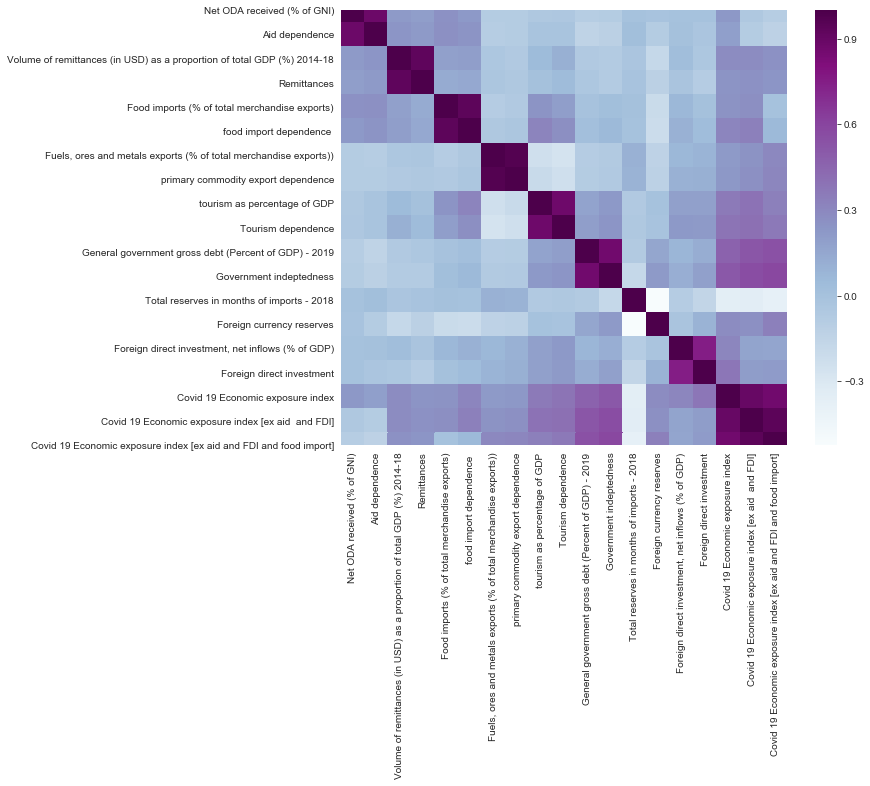

In [4]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
correlations=df.corr()
sns.heatmap(correlations, cmap='BuPu')

In [5]:
df.isnull().sum()

Country                                                                    0
GHRP                                                                       0
Income classification according to WB                                      0
Net ODA received (% of GNI)                                                0
Aid dependence                                                             0
Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18    0
Remittances                                                                0
Food imports (% of total merchandise exports)                              0
food import dependence                                                     0
Fuels, ores and metals exports (% of total merchandise exports))           0
primary commodity export dependence                                        0
tourism as percentage of GDP                                               0
Tourism dependence                                                         0

In [6]:
df.head(10)

,Country,GHRP,Income classification according to WB,Net ODA received (% of GNI),Aid dependence,Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",...,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,"Foreign direct investment, net inflows (% of GDP)",Foreign direct investment,Covid 19 Economic exposure index,Covid 19 Economic exposure index [ex aid and FDI],Covid 19 Economic exposure index [ex aid and FDI and food import]
0,Liechtenstein,No,HIC,5.61,1.33,5.14,1.12,14.31,5.47,25.99,...,4.58,57.71,4.37,4.81,4.2,2.60,1.52,3.31,3.82,3.52
1,Eritrea,No,LIC,5.61,1.33,5.14,1.12,14.31,5.47,25.99,...,4.58,165.10,10.00,4.81,4.2,2.60,1.52,10.00,10.00,10.00
2,Bahrain,No,HIC,5.61,1.33,5.14,1.12,9.40,3.70,76.20,...,3.90,101.70,10.00,0.88,10.0,0.29,0.10,6.30,7.50,8.50
3,South Sudan,Yes,LIC,5.61,1.33,35.27,10.00,14.31,5.47,98.80,...,4.58,34.40,1.80,0.20,10.0,2.60,1.52,8.00,8.00,8.00
4,Bahamas,No,HIC,5.61,1.33,5.14,1.12,19.30,7.70,25.99,...,10.00,61.50,5.20,4.81,4.2,3.96,1.60,6.10,7.60,7.60
5,Cyprus,No,HIC,5.61,1.33,1.83,1.12,12.90,5.20,45.80,...,9.60,96.10,9.50,0.26,10.0,20.86,8.30,7.00,6.70,7.00
6,Greece,No,HIC,5.61,1.33,0.22,1.12,12.10,4.80,43.00,...,8.10,176.60,10.00,0.96,10.0,1.85,0.70,5.60,6.40,6.80
7,Cabo Verde,No,MIC,7.21,1.10,13.03,4.00,30.20,10.00,25.99,...,10.00,123.50,10.00,5.11,1.8,5.46,2.20,5.60,7.20,6.50
8,Montenegro,No,MIC,2.38,1.33,10.80,2.90,21.00,8.40,52.00,...,10.00,81.10,7.60,4.21,3.6,8.82,3.50,5.40,6.60,6.20
9,Jamaica,No,MIC,0.41,1.33,15.92,5.50,16.20,6.50,27.90,...,10.00,93.50,9.20,4.76,2.5,4.93,2.00,4.90,6.20,6.20


In [7]:
encoder = LabelEncoder()
df["GHRP"] = encoder.fit_transform(df["GHRP"])
df["Income classification according to WB"] = encoder.fit_transform(df["Income classification according to WB"])
df.head(10)

,Country,GHRP,Income classification according to WB,Net ODA received (% of GNI),Aid dependence,Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",...,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,"Foreign direct investment, net inflows (% of GDP)",Foreign direct investment,Covid 19 Economic exposure index,Covid 19 Economic exposure index [ex aid and FDI],Covid 19 Economic exposure index [ex aid and FDI and food import]
0,Liechtenstein,0,0,5.61,1.33,5.14,1.12,14.31,5.47,25.99,...,4.58,57.71,4.37,4.81,4.2,2.60,1.52,3.31,3.82,3.52
1,Eritrea,0,1,5.61,1.33,5.14,1.12,14.31,5.47,25.99,...,4.58,165.10,10.00,4.81,4.2,2.60,1.52,10.00,10.00,10.00
2,Bahrain,0,0,5.61,1.33,5.14,1.12,9.40,3.70,76.20,...,3.90,101.70,10.00,0.88,10.0,0.29,0.10,6.30,7.50,8.50
3,South Sudan,1,1,5.61,1.33,35.27,10.00,14.31,5.47,98.80,...,4.58,34.40,1.80,0.20,10.0,2.60,1.52,8.00,8.00,8.00
4,Bahamas,0,0,5.61,1.33,5.14,1.12,19.30,7.70,25.99,...,10.00,61.50,5.20,4.81,4.2,3.96,1.60,6.10,7.60,7.60
5,Cyprus,0,0,5.61,1.33,1.83,1.12,12.90,5.20,45.80,...,9.60,96.10,9.50,0.26,10.0,20.86,8.30,7.00,6.70,7.00
6,Greece,0,0,5.61,1.33,0.22,1.12,12.10,4.80,43.00,...,8.10,176.60,10.00,0.96,10.0,1.85,0.70,5.60,6.40,6.80
7,Cabo Verde,0,2,7.21,1.10,13.03,4.00,30.20,10.00,25.99,...,10.00,123.50,10.00,5.11,1.8,5.46,2.20,5.60,7.20,6.50
8,Montenegro,0,2,2.38,1.33,10.80,2.90,21.00,8.40,52.00,...,10.00,81.10,7.60,4.21,3.6,8.82,3.50,5.40,6.60,6.20
9,Jamaica,0,2,0.41,1.33,15.92,5.50,16.20,6.50,27.90,...,10.00,93.50,9.20,4.76,2.5,4.93,2.00,4.90,6.20,6.20


In [8]:
df.corr()

,GHRP,Income classification according to WB,Net ODA received (% of GNI),Aid dependence,Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",primary commodity export dependence,...,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,"Foreign direct investment, net inflows (% of GDP)",Foreign direct investment,Covid 19 Economic exposure index,Covid 19 Economic exposure index [ex aid and FDI],Covid 19 Economic exposure index [ex aid and FDI and food import]
GHRP,1.000000,0.139028,0.012967,0.056504,0.054037,0.032007,0.062732,0.062168,0.188400,0.158509,...,-0.245843,-0.006848,-0.045906,0.056635,-0.086421,0.061760,0.035155,-0.003440,0.003583,-0.021393
Income classification according to WB,0.139028,1.000000,-0.120646,0.077119,0.260977,0.150487,0.153081,0.186236,0.048279,0.042825,...,0.032488,-0.122792,-0.135875,0.113267,-0.345615,0.082716,-0.088773,-0.164794,-0.073048,-0.103277
Net ODA received (% of GNI),0.012967,-0.120646,1.000000,0.886556,0.218284,0.199497,0.260634,0.225997,-0.082332,-0.080675,...,-0.044540,-0.094961,-0.079246,0.005849,-0.011748,0.001979,0.003411,0.231556,-0.053470,-0.094347
Aid dependence,0.056504,0.077119,0.886556,1.000000,0.238976,0.217125,0.262258,0.244550,-0.092051,-0.081697,...,-0.012790,-0.139071,-0.115089,0.029464,-0.081867,0.009052,-0.024397,0.191193,-0.078486,-0.125459
Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,0.054037,0.260977,0.218284,0.238976,1.000000,0.930646,0.187175,0.199793,-0.037115,-0.064191,...,0.108308,-0.061104,-0.076773,-0.027478,-0.175603,0.030677,-0.037140,0.280895,0.280759,0.256343
Remittances,0.032007,0.150487,0.199497,0.217125,0.930646,1.000000,0.135741,0.147340,-0.030363,-0.051963,...,0.042899,-0.041382,-0.074201,-0.008688,-0.114429,-0.018799,-0.086704,0.248695,0.257721,0.243131
Food imports (% of total merchandise exports),0.062732,0.153081,0.260634,0.262258,0.187175,0.135741,1.000000,0.934734,-0.088225,-0.060845,...,0.199008,-0.002229,0.028378,0.011424,-0.196729,0.067280,0.009210,0.254702,0.272704,0.001675
food import dependence,0.062168,0.186236,0.225997,0.244550,0.199793,0.147340,0.934734,1.000000,-0.052531,-0.035237,...,0.268826,0.020080,0.058214,0.002961,-0.213765,0.104183,0.039359,0.311739,0.338837,0.058327
"Fuels, ores and metals exports (% of total merchandise exports))",0.188400,0.048279,-0.082332,-0.092051,-0.037115,-0.030363,-0.088225,-0.052531,1.000000,0.975702,...,-0.263742,-0.087152,-0.067272,0.101969,-0.136502,0.071326,0.085015,0.216588,0.254348,0.302438
primary commodity export dependence,0.158509,0.042825,-0.080675,-0.081697,-0.064191,-0.051963,-0.060845,-0.035237,0.975702,1.000000,...,-0.236580,-0.078763,-0.062871,0.090349,-0.120911,0.101808,0.112070,0.228359,0.264664,0.308327


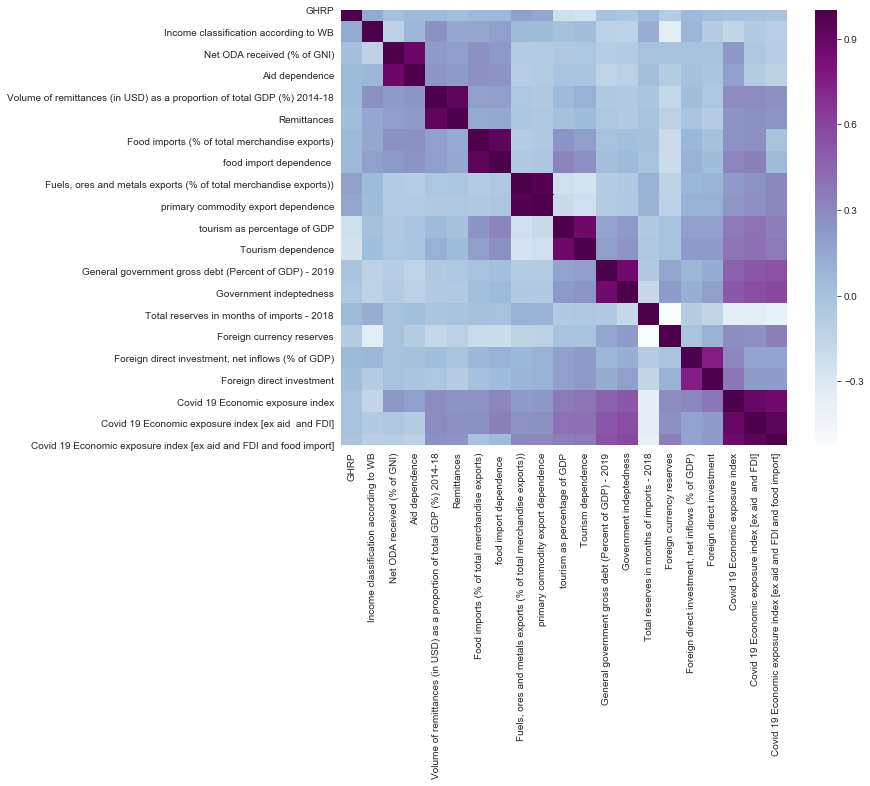

In [9]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
correlations=df.corr()
sns.heatmap(correlations, cmap='BuPu')

In [10]:
print(df.shape)
df.columns

(191, 22)


Index(['Country', 'GHRP', 'Income classification according to WB',
       'Net ODA received (% of GNI)', 'Aid dependence',
       'Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18',
       'Remittances', 'Food imports (% of total merchandise exports)',
       'food import dependence ',
       'Fuels, ores and metals exports (% of total merchandise exports))',
       'primary commodity export dependence', 'tourism as percentage of GDP',
       'Tourism dependence',
       'General government gross debt (Percent of GDP) - 2019',
       'Government indeptedness', 'Total reserves in months of imports - 2018',
       'Foreign currency reserves',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment', 'Covid 19 Economic exposure index',
       'Covid 19 Economic exposure index [ex aid  and FDI]',
       'Covid 19 Economic exposure index [ex aid and FDI and food import]'],
      dtype='object')

<h1>MODEL FOR "Covid 19 Economic exposure index"</h1>

In [11]:
column_list_1 = ['Net ODA received (% of GNI)','Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18',
       'Remittances', 'Food imports (% of total merchandise exports)',
       'food import dependence ',
       'Fuels, ores and metals exports (% of total merchandise exports))',
       'primary commodity export dependence', 'tourism as percentage of GDP',
       'Tourism dependence',
       'General government gross debt (Percent of GDP) - 2019',
       'Government indeptedness', 'Total reserves in months of imports - 2018',
       'Foreign currency reserves',
       'Foreign direct investment, net inflows (% of GDP)','Foreign direct investment','Covid 19 Economic exposure index']

In [12]:
df_Economic_Exposure_Index = df[column_list_1]
df_Economic_Exposure_Index.shape

(191, 16)

In [13]:
df_Economic_Exposure_Index.head(10)

,Net ODA received (% of GNI),Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",primary commodity export dependence,tourism as percentage of GDP,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,"Foreign direct investment, net inflows (% of GDP)",Foreign direct investment,Covid 19 Economic exposure index
0,5.61,5.14,1.12,14.31,5.47,25.99,3.23,13.33,4.58,57.71,4.37,4.81,4.2,2.60,1.52,3.31
1,5.61,5.14,1.12,14.31,5.47,25.99,3.23,13.33,4.58,165.10,10.00,4.81,4.2,2.60,1.52,10.00
2,5.61,5.14,1.12,9.40,3.70,76.20,10.00,9.80,3.90,101.70,10.00,0.88,10.0,0.29,0.10,6.30
3,5.61,35.27,10.00,14.31,5.47,98.80,10.00,13.33,4.58,34.40,1.80,0.20,10.0,2.60,1.52,8.00
4,5.61,5.14,1.12,19.30,7.70,25.99,3.23,48.80,10.00,61.50,5.20,4.81,4.2,3.96,1.60,6.10
5,5.61,1.83,1.12,12.90,5.20,45.80,6.10,24.00,9.60,96.10,9.50,0.26,10.0,20.86,8.30,7.00
6,5.61,0.22,1.12,12.10,4.80,43.00,5.70,20.10,8.10,176.60,10.00,0.96,10.0,1.85,0.70,5.60
7,7.21,13.03,4.00,30.20,10.00,25.99,3.23,43.60,10.00,123.50,10.00,5.11,1.8,5.46,2.20,5.60
8,2.38,10.80,2.90,21.00,8.40,52.00,6.90,25.10,10.00,81.10,7.60,4.21,3.6,8.82,3.50,5.40
9,0.41,15.92,5.50,16.20,6.50,27.90,3.70,34.40,10.00,93.50,9.20,4.76,2.5,4.93,2.00,4.90


In [14]:
df_Economic_Exposure_Index.corr()

,Net ODA received (% of GNI),Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",primary commodity export dependence,tourism as percentage of GDP,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,"Foreign direct investment, net inflows (% of GDP)",Foreign direct investment,Covid 19 Economic exposure index
Net ODA received (% of GNI),1.000000,0.218284,0.199497,0.260634,0.225997,-0.082332,-0.080675,-0.051581,-0.044540,-0.094961,-0.079246,0.005849,-0.011748,0.001979,0.003411,0.231556
Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,0.218284,1.000000,0.930646,0.187175,0.199793,-0.037115,-0.064191,0.049594,0.108308,-0.061104,-0.076773,-0.027478,-0.175603,0.030677,-0.037140,0.280895
Remittances,0.199497,0.930646,1.000000,0.135741,0.147340,-0.030363,-0.051963,0.006642,0.042899,-0.041382,-0.074201,-0.008688,-0.114429,-0.018799,-0.086704,0.248695
Food imports (% of total merchandise exports),0.260634,0.187175,0.135741,1.000000,0.934734,-0.088225,-0.060845,0.248588,0.199008,-0.002229,0.028378,0.011424,-0.196729,0.067280,0.009210,0.254702
food import dependence,0.225997,0.199793,0.147340,0.934734,1.000000,-0.052531,-0.035237,0.318893,0.268826,0.020080,0.058214,0.002961,-0.213765,0.104183,0.039359,0.311739
"Fuels, ores and metals exports (% of total merchandise exports))",-0.082332,-0.037115,-0.030363,-0.088225,-0.052531,1.000000,0.975702,-0.236052,-0.263742,-0.087152,-0.067272,0.101969,-0.136502,0.071326,0.085015,0.216588
primary commodity export dependence,-0.080675,-0.064191,-0.051963,-0.060845,-0.035237,0.975702,1.000000,-0.195865,-0.236580,-0.078763,-0.062871,0.090349,-0.120911,0.101808,0.112070,0.228359
tourism as percentage of GDP,-0.051581,0.049594,0.006642,0.248588,0.318893,-0.236052,-0.195865,1.000000,0.880471,0.177137,0.222075,-0.062314,0.002222,0.188048,0.188136,0.358851
Tourism dependence,-0.044540,0.108308,0.042899,0.199008,0.268826,-0.263742,-0.236580,0.880471,1.000000,0.200651,0.238222,-0.051262,-0.007539,0.222078,0.214518,0.388636
General government gross debt (Percent of GDP) - 2019,-0.094961,-0.061104,-0.041382,-0.002229,0.020080,-0.087152,-0.078763,0.177137,0.200651,1.000000,0.864371,-0.068480,0.160020,0.082081,0.124126,0.465953


In [15]:
# Model with Columns who have a Correlation of 0.2 and above
y_column_list_1=df_Economic_Exposure_Index['Covid 19 Economic exposure index']
x_column_list_1=df_Economic_Exposure_Index.drop( labels='Covid 19 Economic exposure index',axis=1)
lr.fit(x_column_list_1,y_column_list_1)
lr.score(x_column_list_1,y_column_list_1)

0.7813107705132221

In [16]:
#Model with all the columns
y_df_1 = df["Covid 19 Economic exposure index"]
x_df_1 = df.drop(labels = ["Covid 19 Economic exposure index","Covid 19 Economic exposure index [ex aid  and FDI]","Covid 19 Economic exposure index [ex aid and FDI and food import]", "Country"], axis=1)
lr.fit(x_df_1, y_df_1)
lr.score(x_df_1, y_df_1)

0.798747651696849

<h1>MODEL FOR "Covid 19 Economic exposure index [ex aid  and FDI]"</h1>

In [17]:
column_list_2 = ['Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18',
       'Remittances', 'Food imports (% of total merchandise exports)',
       'food import dependence ',
       'Fuels, ores and metals exports (% of total merchandise exports))',
       'primary commodity export dependence', 'tourism as percentage of GDP',
       'Tourism dependence',
       'General government gross debt (Percent of GDP) - 2019',
       'Government indeptedness', 'Total reserves in months of imports - 2018',
       'Foreign currency reserves',
       'Foreign direct investment','Covid 19 Economic exposure index [ex aid  and FDI]',]

In [18]:
df_Economic_aid_FDI = df[column_list_2]
df_Economic_aid_FDI.shape

(191, 14)

In [19]:
df_Economic_aid_FDI.corr()

,Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",primary commodity export dependence,tourism as percentage of GDP,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,Foreign direct investment,Covid 19 Economic exposure index [ex aid and FDI]
Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,1.000000,0.930646,0.187175,0.199793,-0.037115,-0.064191,0.049594,0.108308,-0.061104,-0.076773,-0.027478,-0.175603,-0.037140,0.280759
Remittances,0.930646,1.000000,0.135741,0.147340,-0.030363,-0.051963,0.006642,0.042899,-0.041382,-0.074201,-0.008688,-0.114429,-0.086704,0.257721
Food imports (% of total merchandise exports),0.187175,0.135741,1.000000,0.934734,-0.088225,-0.060845,0.248588,0.199008,-0.002229,0.028378,0.011424,-0.196729,0.009210,0.272704
food import dependence,0.199793,0.147340,0.934734,1.000000,-0.052531,-0.035237,0.318893,0.268826,0.020080,0.058214,0.002961,-0.213765,0.039359,0.338837
"Fuels, ores and metals exports (% of total merchandise exports))",-0.037115,-0.030363,-0.088225,-0.052531,1.000000,0.975702,-0.236052,-0.263742,-0.087152,-0.067272,0.101969,-0.136502,0.085015,0.254348
primary commodity export dependence,-0.064191,-0.051963,-0.060845,-0.035237,0.975702,1.000000,-0.195865,-0.236580,-0.078763,-0.062871,0.090349,-0.120911,0.112070,0.264664
tourism as percentage of GDP,0.049594,0.006642,0.248588,0.318893,-0.236052,-0.195865,1.000000,0.880471,0.177137,0.222075,-0.062314,0.002222,0.188136,0.393396
Tourism dependence,0.108308,0.042899,0.199008,0.268826,-0.263742,-0.236580,0.880471,1.000000,0.200651,0.238222,-0.051262,-0.007539,0.214518,0.407764
General government gross debt (Percent of GDP) - 2019,-0.061104,-0.041382,-0.002229,0.020080,-0.087152,-0.078763,0.177137,0.200651,1.000000,0.864371,-0.068480,0.160020,0.124126,0.519764
Government indeptedness,-0.076773,-0.074201,0.028378,0.058214,-0.067272,-0.062871,0.222075,0.238222,0.864371,1.000000,-0.178215,0.217940,0.188129,0.564168


In [20]:
# Model with Columns who have a Correlation of 0.2 and above
y_column_list_2=df_Economic_aid_FDI['Covid 19 Economic exposure index [ex aid  and FDI]']
x_column_list_2=df_Economic_aid_FDI.drop( labels='Covid 19 Economic exposure index [ex aid  and FDI]',axis=1)
lr.fit(x_column_list_2, y_column_list_2)
lr.score(x_column_list_2, y_column_list_2)

0.8048207337795678

In [21]:
# Model with all the Columns
y_df_2 = df['Covid 19 Economic exposure index [ex aid  and FDI]']
x_df_2 = df.drop(labels = ["Covid 19 Economic exposure index","Covid 19 Economic exposure index [ex aid  and FDI]","Covid 19 Economic exposure index [ex aid and FDI and food import]", "Country"], axis=1)
lr.fit(x_df_2, y_df_2)
lr.score(x_df_2, y_df_2)

0.81809410792357

<h1>MODEL FOR "Covid 19 Economic exposure index [ex aid and FDI and food import]"</h1>


In [22]:
column_list_3 = ['Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18',
       'Remittances', 'Food imports (% of total merchandise exports)',
       'food import dependence ',
       'Fuels, ores and metals exports (% of total merchandise exports))',
       'primary commodity export dependence', 'tourism as percentage of GDP',
       'Tourism dependence',
       'General government gross debt (Percent of GDP) - 2019',
       'Government indeptedness', 'Total reserves in months of imports - 2018',
       'Foreign currency reserves',
       'Foreign direct investment','Covid 19 Economic exposure index [ex aid and FDI and food import]']
#'Food imports (% of total merchandise exports)',
       #'food import dependence ',

In [23]:
df_Economic_aid_FDI_Food = df[column_list_3]
df_Economic_aid_FDI_Food.shape

(191, 14)

In [24]:
df_Economic_aid_FDI_Food.corr()

,Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,Remittances,Food imports (% of total merchandise exports),food import dependence,"Fuels, ores and metals exports (% of total merchandise exports))",primary commodity export dependence,tourism as percentage of GDP,Tourism dependence,General government gross debt (Percent of GDP) - 2019,Government indeptedness,Total reserves in months of imports - 2018,Foreign currency reserves,Foreign direct investment,Covid 19 Economic exposure index [ex aid and FDI and food import]
Volume of remittances (in USD) as a proportion of total GDP (%) 2014-18,1.000000,0.930646,0.187175,0.199793,-0.037115,-0.064191,0.049594,0.108308,-0.061104,-0.076773,-0.027478,-0.175603,-0.037140,0.256343
Remittances,0.930646,1.000000,0.135741,0.147340,-0.030363,-0.051963,0.006642,0.042899,-0.041382,-0.074201,-0.008688,-0.114429,-0.086704,0.243131
Food imports (% of total merchandise exports),0.187175,0.135741,1.000000,0.934734,-0.088225,-0.060845,0.248588,0.199008,-0.002229,0.028378,0.011424,-0.196729,0.009210,0.001675
food import dependence,0.199793,0.147340,0.934734,1.000000,-0.052531,-0.035237,0.318893,0.268826,0.020080,0.058214,0.002961,-0.213765,0.039359,0.058327
"Fuels, ores and metals exports (% of total merchandise exports))",-0.037115,-0.030363,-0.088225,-0.052531,1.000000,0.975702,-0.236052,-0.263742,-0.087152,-0.067272,0.101969,-0.136502,0.085015,0.302438
primary commodity export dependence,-0.064191,-0.051963,-0.060845,-0.035237,0.975702,1.000000,-0.195865,-0.236580,-0.078763,-0.062871,0.090349,-0.120911,0.112070,0.308327
tourism as percentage of GDP,0.049594,0.006642,0.248588,0.318893,-0.236052,-0.195865,1.000000,0.880471,0.177137,0.222075,-0.062314,0.002222,0.188136,0.337798
Tourism dependence,0.108308,0.042899,0.199008,0.268826,-0.263742,-0.236580,0.880471,1.000000,0.200651,0.238222,-0.051262,-0.007539,0.214518,0.367099
General government gross debt (Percent of GDP) - 2019,-0.061104,-0.041382,-0.002229,0.020080,-0.087152,-0.078763,0.177137,0.200651,1.000000,0.864371,-0.068480,0.160020,0.124126,0.542645
Government indeptedness,-0.076773,-0.074201,0.028378,0.058214,-0.067272,-0.062871,0.222075,0.238222,0.864371,1.000000,-0.178215,0.217940,0.188129,0.584577


In [25]:
# Model with Columns who have a Correlation of 0.2 and above
y_column_list_3=df_Economic_aid_FDI_Food['Covid 19 Economic exposure index [ex aid and FDI and food import]']
x_column_list_3=df_Economic_aid_FDI_Food.drop( labels='Covid 19 Economic exposure index [ex aid and FDI and food import]',axis=1)
lr.fit(x_column_list_3, y_column_list_3)
lr.score(x_column_list_3, y_column_list_3)

0.8184622415051798

In [26]:
# Model with all the Columns
y_df_3 = df['Covid 19 Economic exposure index [ex aid and FDI and food import]']
x_df_3 = df.drop(labels = ["Covid 19 Economic exposure index","Covid 19 Economic exposure index [ex aid  and FDI]","Covid 19 Economic exposure index [ex aid and FDI and food import]", "Country"], axis=1)
lr.fit(x_df_3, y_df_3)
lr.score(x_df_3, y_df_3)

0.8237760959296228

<h3> Just checked with train test split </h3>

In [27]:
# MODEL 1:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_df_1, y_df_1, test_size=0.32,random_state=0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R2_SCORE = ",r2_score(y_test,y_pred))
print("Mean Square Error = ",mean_squared_error(y_test,y_pred))
print(len(x_train))
print(len(x_test))

R2_SCORE =  0.8215591540046783
Mean Square Error =  0.27134149539009733
129
62


In [28]:
# MODEL 2:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_df_2, y_df_2, test_size=0.32,random_state=0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R2_SCORE = ",r2_score(y_test,y_pred))
print("Mean Square Error = ",mean_squared_error(y_test,y_pred))

R2_SCORE =  0.837544378023509
Mean Square Error =  0.3392435995931712


In [29]:
# MODEL 3:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_df_3, y_df_3, test_size=0.32,random_state=0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R2_SCORE = ",r2_score(y_test,y_pred))
print("Mean Square Error = ",mean_squared_error(y_test,y_pred))

R2_SCORE =  0.8394584505761609
Mean Square Error =  0.34964312308232914
